# GMM and K Means 
Name: Praveen Chandrasekaran 
<br>
email: pc2846@gmail.com

In [24]:
# Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Setup for visualisations
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(12,7), 
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'}, font_scale=1.5)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

In [26]:
# loading the dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Unscaled data
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [27]:
# Tranforming the real dataset from Sklearn into a dataframe 
df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width']) # Changing column names
species = [] # Creating empty list to load the  
df["targets"] = pd.Series(iris.target)
for i in range(len(df)): # Iterating thorugh length of df to check if targets at each cell is 0,1 or 2 and append the right name
    if df.iloc[i]['targets'] == 0:
        species.append('setosa')    
    elif df.iloc[i]['targets'] == 1:
        species.append('versicolor')
    elif df.iloc[i]['targets'] == 2:
        species.append('virginica')
df['target_species'] = species # Merging new column with the old df

# Resultant dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,targets,target_species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


**Observation**: We can see that the above dataframe has sizes. It will be helpful if the data points are scaled.

In [28]:
# Normalizing the features that are to be clustered
input_feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for column in input_feature_columns:
    average = df[column].mean()
    std_dev = df[column].std()
    df[column] = df[column].apply(lambda x: (x-average)/std_dev)
    

# Resultant dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,targets,target_species
0,-0.897674,1.015602,-1.335752,-1.311052,0,setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,0,setosa
2,-1.380727,0.327318,-1.392399,-1.311052,0,setosa
3,-1.501490,0.097889,-1.279104,-1.311052,0,setosa
4,-1.018437,1.245030,-1.335752,-1.311052,0,setosa


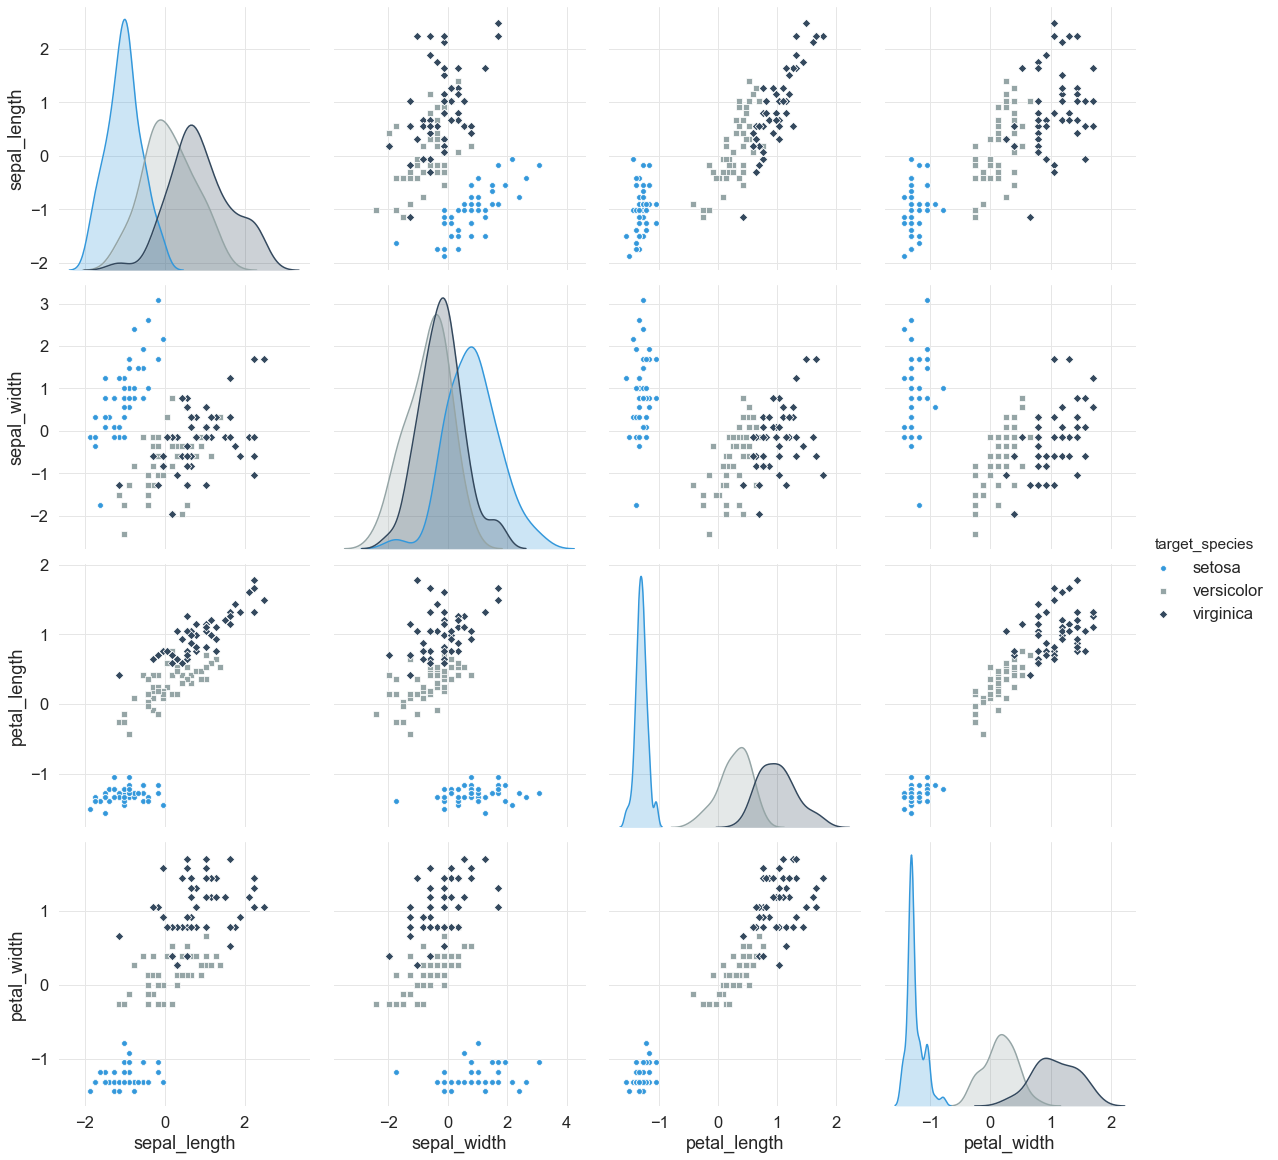

In [29]:
# Visualizing Iris dataframe
sns.pairplot(df.drop(['targets'],axis=1), hue='target_species', height=4, markers = ["8","s","D"])
# Showing the plot
plt.show()

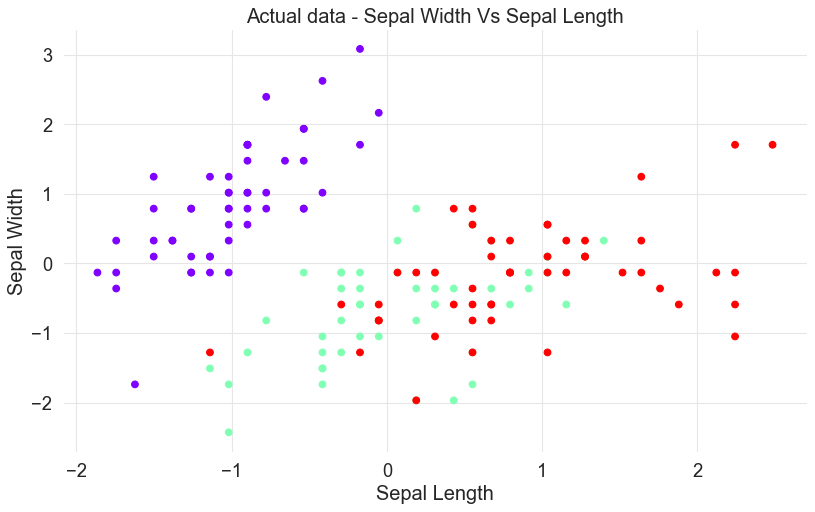

In [30]:
# Data viz. Iris dataset - Sepal length & Width

plt.figure(figsize=(12,7), dpi=80)
plt.title("Actual data - Sepal Width Vs Sepal Length")
plt.scatter(x = df['sepal_length'], y = df['sepal_width'] , c = iris.target, cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
 
# Showing the plot
plt.show()

**Observation**: We can see some overlapping of the data points in the above graph, which means GMM works better than the K means if the Sepal size are used

### Visualizing actual data

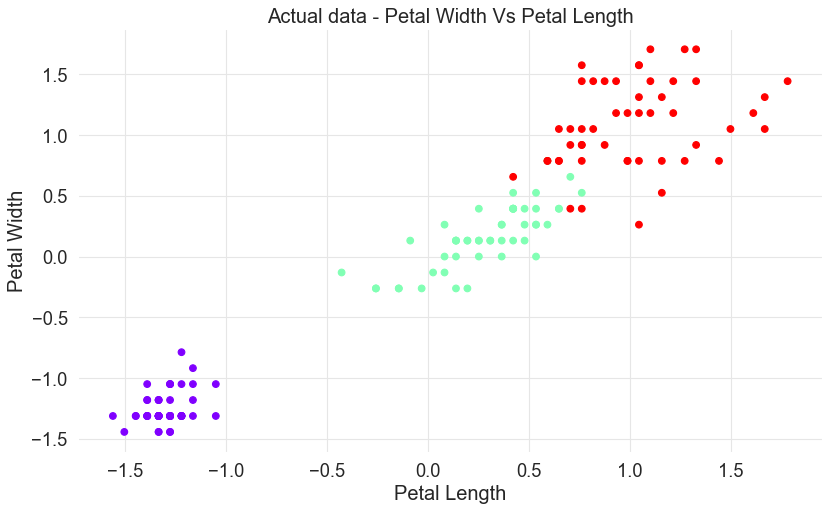

In [31]:
# Data viz. of Iris dataset - Petal length & Width

plt.figure(figsize=(12,7), dpi=80)
plt.title("Actual data - Petal Width Vs Petal Length")
plt.scatter(x = df['petal_length'], y = df['petal_width'] , c = iris.target, cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Showing the plot
plt.show()

### Knowledge about GMM before implementing it

Notes on GMM:
- Assumes the existence of a specified number of distributions within the data. Each distribution with its own mean (μ) and variance (σ²) / covariance (Cov)
- Gaussian Mixture Models assume that your data follows Gaussian (a.k.a. Normal) distribution
- It is based on a probability that the point belongs to a said distribution
- GMM can be described as a soft clustering approach where no hard decision boundary exists
- Cannot be said that the GMM is better than K means, because K means works better when the data points within induvidual clusters are scattered in a circle

Notes on Expectation-Maximization (EM):
- EM uses an iterative method to calculate and recalculate the parameters of each cluster (distribution), i.e., mean, variance/covariance, and size

In [32]:
# Importing GMM from sklearn
from sklearn.mixture import GaussianMixture

In [33]:
# Fitting the model on scaled dataset
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)

# Predicting the clusters
gmm_cluster_labels = gmm.predict(iris.data)

# Seeing the clusters
gmm_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

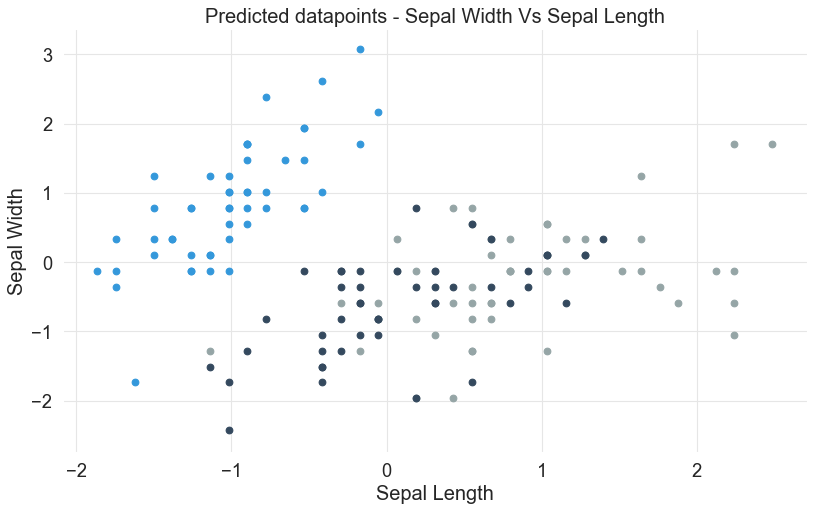

In [34]:
# Essentital methods from numpy 
from numpy import unique
from numpy import where

# Retrieve unique clusters
clusters = unique(gmm_cluster_labels)

plt.figure(figsize=(12,7), dpi=80)
# Create scatter plot for samples from each cluster
for cluster in clusters:
    # Get row indexes for samples with this cluster
    row_ix = where(gmm_cluster_labels == cluster)
    # Create scatter of these samples
    plt.scatter(iris.data[row_ix, 0], iris.data[row_ix, 1])

plt.title("Predicted datapoints - Sepal Width Vs Sepal Length")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Showing the plot
plt.show()

In [35]:
# Printing the converged log-likelihood value and the number of iterations needed to converge
print("Lower bound: ", gmm.lower_bound_)
print("No. of iterations required: ", gmm.n_iter_)
print("It needed 14 iterations for the log-likelihood to converge. If more iterations are performed, no appreciable change in the log-likelihood value, can be observed.")

Lower bound:  -1.9237120605379148
No. of iterations required:  14
It needed 14 iterations for the log-likelihood to converge. If more iterations are performed, no appreciable change in the log-likelihood value, can be observed.


In [36]:
# Model Accuracy 
print("Above model accuracy= ", (np.sum(gmm_cluster_labels)/len(gmm_cluster_labels)))

Above model accuracy=  0.9666666666666667


In [37]:
# Importing sample generator for experimentation
from sklearn.datasets.samples_generator import make_blobs

# Setting parameters for generating the blobs
blob_centers =  np.array([[ 0.2,  2.3],[-1.5 ,  2.3],[-2.8,  1.8],[-2.8,  2.8],[-2.8,  1.3]])
blob_stds = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_stds, random_state=0)

# Summary of the blobs
print("No. of clusters: ", 5)
print()
print("No of samples: ", 2000)
print()
print("Input features: ")
print(X[:5])
print()
print("Target classes: ")
print(y[:5])

No. of clusters:  5

No of samples:  2000

Input features: 
[[ 1.27848962  2.27043013]
 [-2.79898145  2.01982963]
 [-2.75336204  1.79056075]
 [-2.9641554   1.21099744]
 [-2.74874378  2.76408834]]

Target classes: 
[0 2 2 4 3]


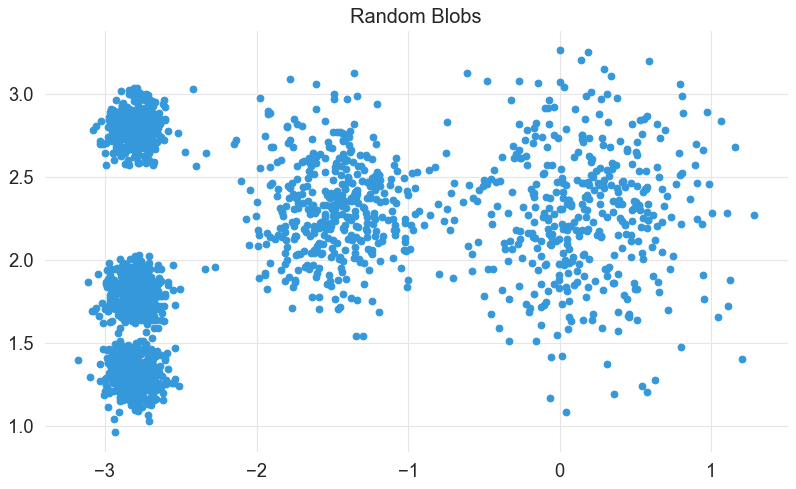

In [38]:
# Visualizing the blobs
plt.figure(figsize=(12,7), dpi=80)
plt.title("Random Blobs")
plt.scatter(X[:,0], X[:,1])

# Showing the plot
plt.show()

In [39]:
# Import KMeans from Sklearn
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=5)

# Fitting KMeans to data 
y_pred = clf.fit_predict(X)

# Printing values of cluster centers learned by KMeans 
print("Cluster centers AKA centroids: ")
print(clf.cluster_centers_)
print()

# Printing different labels 
print("First 10 predicted lables: ")
print(y_pred[:10])

Cluster centers AKA centroids: 
[[ 0.17864202  2.27506362]
 [-2.80446936  1.79959228]
 [-1.46332098  2.31083369]
 [-2.80379109  1.30017997]
 [-2.80180006  2.79464334]]

First 10 predicted lables: 
[0 1 1 3 4 3 3 4 0 2]


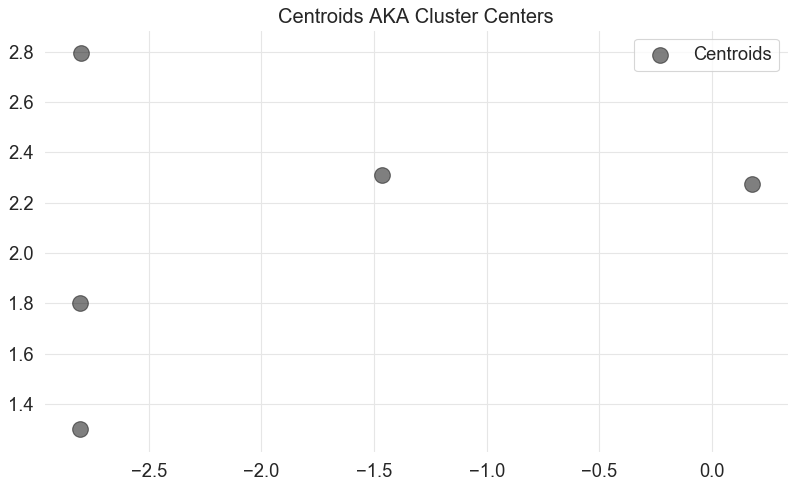

In [40]:
# Visualizing the above centres/centroids
plt.figure(figsize=(12,7), dpi=80)
plt.title("Centroids AKA Cluster Centers")
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], c='black',  
            s=200, alpha=0.5, label = "Centroids")
plt.legend()

# Showing the plot
plt.show()

In [41]:
# Given data points - Test
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

# Predicting labels of new instance
clf.predict(X_new)

array([0, 0, 4, 4])

In [42]:
# Showing the distance from each instance to every centroid for he new input data points 
clf.transform(X_new)

array([[0.32798318, 2.81162082, 1.49596988, 2.88980839, 2.91230864],
       [2.8347347 , 5.80792801, 4.4741314 , 5.84583091, 5.85596635],
       [3.2602604 , 1.21622815, 1.68414151, 1.71110668, 0.28540248],
       [3.18659089, 0.72718856, 1.5482785 , 1.21575739, 0.35510268]])

**Observation**: The first instance in X_new is located at a distance of 2.81 from the first centroid andn0.33 from second centroid and so on for every instances

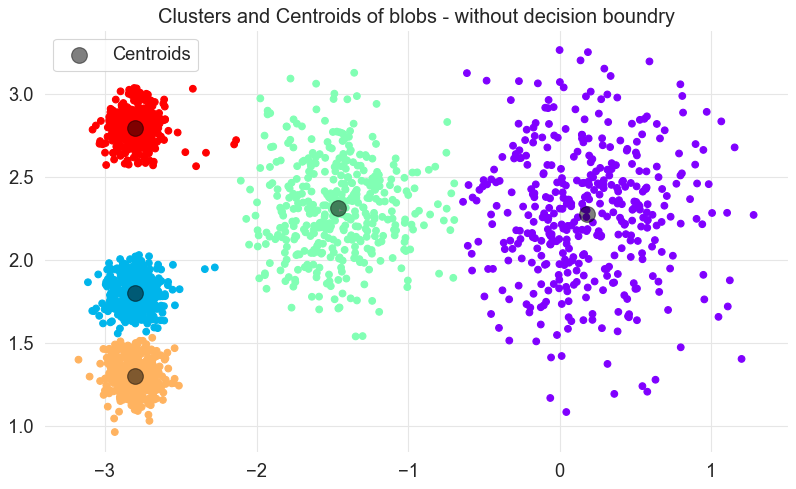

In [43]:
# Assigning cluster centers to a variable
z = clf.cluster_centers_

# Plotting the clusters and centers 
plt.figure(figsize=(12,7), dpi=80)
plt.title("Clusters and Centroids of blobs - without decision boundry")
plt.scatter(X[:,0], X[:,1], c = clf.labels_, cmap="rainbow")
plt.scatter(z[:, 0], z[:, 1], c='black', s=200, alpha=0.5, label = "Centroids", marker="o")
plt.legend(loc="upper left")

# Showing the plot
plt.show()

<Figure size 960x560 with 0 Axes>

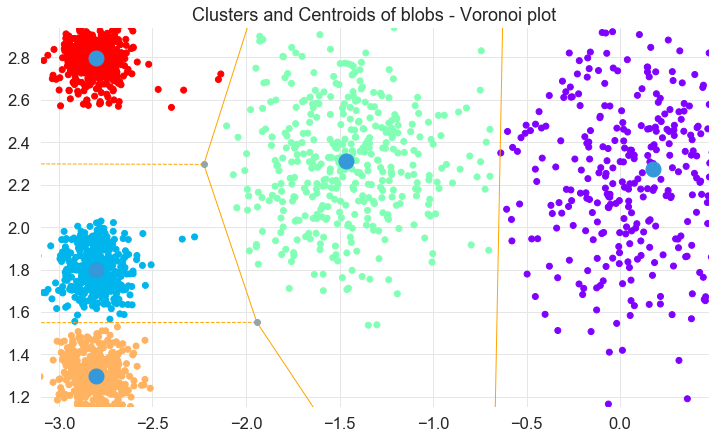

In [44]:
# Importing Scipy for plotting
from scipy.spatial import Voronoi, voronoi_plot_2d

# Plotting decision boundries using Voronoi 
vor = Voronoi(z)
plt.figure(figsize=(12,7), dpi=80)
voronoi_plot_2d(vor, point_size = 30, line_colors='orange')
plt.title("Clusters and Centroids of blobs - Voronoi plot")
plt.scatter(X[:,0], X[:,1], c = clf.labels_, cmap="rainbow")

# Showing the plot
plt.show()

In [45]:
# Setting the value of K to 3 and 8 respectively
clf_2 = KMeans(n_clusters=3)
clf_3 = KMeans(n_clusters=8)

# Fitting KMeans to data 
y_pred_2 = clf_2.fit_predict(X)
y_pred_3 = clf_3.fit_predict(X)

# Printing values of cluster centers learned by KMeans 
print("Numbers of clusters is equal to 3")
print()
print("Cluster centers AKA centroids when number of clusters is equal to 3: ")
print(clf_2.cluster_centers_)
print()

# Printing different labels 
print("First 10 predicted lables when number of clusters is equal to 3: ")
print(y_pred_2[:10])
print()

# Printing values of cluster centers learned by KMeans 
print("Numbers of clusters is equal to 8")
print()
print("Cluster centers AKA centroids when number of clusters is equal to 8: ")
print(clf_3.cluster_centers_)
print()

# Printing different labels 
print("First 10 predicted lables when number of clusters is equal to 8: ")
print(y_pred_3[:10])

Numbers of clusters is equal to 3

Cluster centers AKA centroids when number of clusters is equal to 3: 
[[-2.8047944   1.55187579]
 [ 0.0771363   2.27284941]
 [-2.19950674  2.56899558]]

First 10 predicted lables when number of clusters is equal to 3: 
[1 0 0 0 2 0 0 2 1 1]

Numbers of clusters is equal to 8

Cluster centers AKA centroids when number of clusters is equal to 8: 
[[-2.80446936  1.79959228]
 [ 0.21382447  1.85429894]
 [-1.45436294  2.11368919]
 [-2.80508778  2.79507147]
 [-2.80379109  1.30017997]
 [ 0.45601077  2.55031721]
 [-0.26958018  2.40868071]
 [-1.53664619  2.56440342]]

First 10 predicted lables when number of clusters is equal to 8: 
[5 0 0 4 3 4 4 3 5 6]


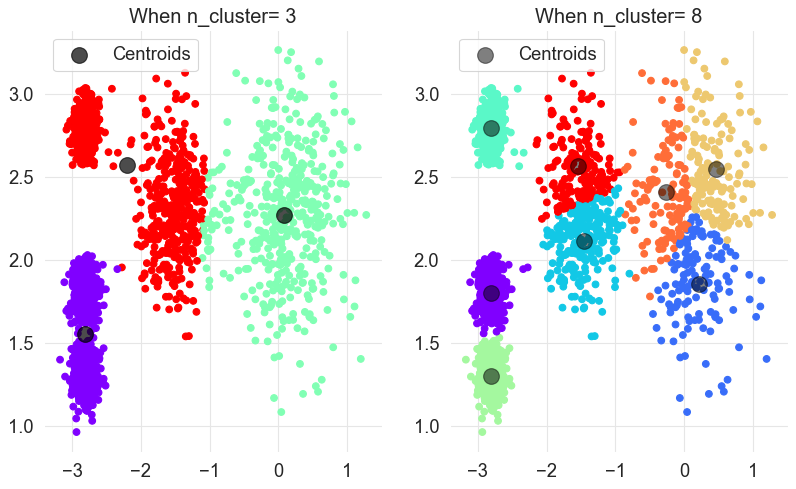

Displaying the different inertia values when n_cluster = 3 and n_cluster = 8: 
Inertia when k=3 :  646.230269055688
Inertia when k=8:  121.94125041569197

Within clusters sum of squares (inertias): 
[1147.6895654574178, 646.230269055688, 260.9077558778155, 210.90540191468097, 168.94817495072417, 141.50404362186728, 121.52240232740013, 105.3588732402792]

Observation: 
The sequences decreases with big leaps



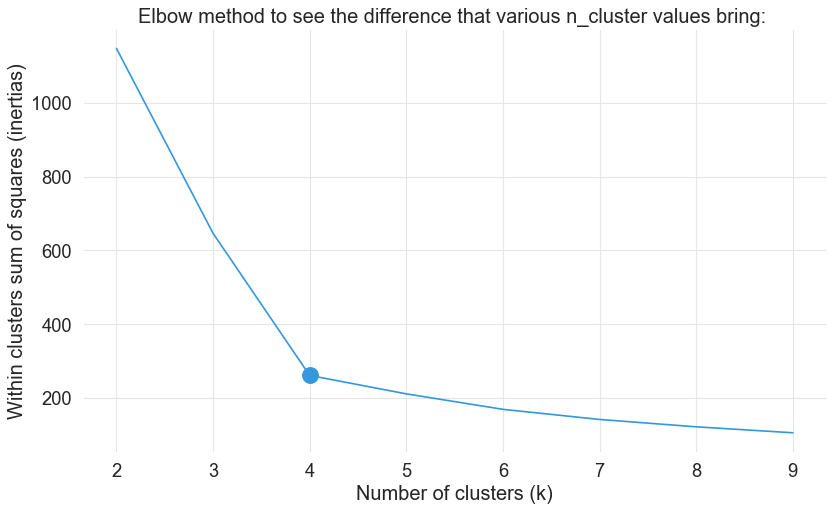

Inertia @ k=3:  646.230269055688
Inertia @ k=8:  121.94125041569197
- Optimal K vlaue for clustering the blobs is when k=4, and it the value at the elbow and any lower value would be dramtaic and  any higher value will not help much
- Inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.
- We can see that inertia values decreases from k=3 to k=8 and then the inertia values doesn't change a lot 
Difference is 2 inertia values is 524.6603


In [46]:
# Assigning cluster centers to a variable
z2 = clf_2.cluster_centers_

# Plotting the clusters and centers 
plt.figure(figsize=(12,7), dpi=80)
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c = clf_2.labels_, cmap="rainbow")
plt.scatter(z2[:, 0], z2[:, 1], c='black', s=200, alpha=0.7, label = "Centroids", marker="o")
plt.legend(loc="upper left")
plt.title("When n_cluster= 3")


# Assigning cluster centers to a variable
z3 = clf_3.cluster_centers_

# Plotting the clusters and centers 
plt.subplot(1,2,2)
plt.title("When n_cluster= 8")
plt.scatter(X[:,0], X[:,1], c = clf_3.labels_, cmap="rainbow")
plt.scatter(z3[:, 0], z3[:, 1], c='black', s=200, alpha=0.5, label = "Centroids", marker="o")
plt.legend(loc="upper left")

# Showing the plot
plt.show()

# Displaying the different inertia values when n = 3 and n = 8
print("Displaying the different inertia values when n_cluster = 3 and n_cluster = 8: ")
print("Inertia when k=3 : ",clf_2.inertia_)
print("Inertia when k=8: ",clf_3.inertia_)
print()

# Plotting the k vs inertias
wcss = []
for i in range(2,10):
    clf = KMeans(i)
    clf.fit(X)
    wcss_iteration = clf.inertia_
    wcss.append(wcss_iteration)
 
# Displaying the results after the above iterations are done
print("Within clusters sum of squares (inertias): ")
print(wcss)
print()
print("Observation: ")
print("The sequences decreases with big leaps")
print()

# Elbow method
plt.figure(figsize=(12,7), dpi=80)
number_clusters = range(2,10)
plt.plot(number_clusters,wcss)
plt.scatter(4, wcss[2] ,marker="o", s = 200)
plt.title("Elbow method to see the difference that various n_cluster values bring: ")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within clusters sum of squares (inertias)")
plt.show()

# Displaying the difference in inertia values for k = 3 and k =8
print("Inertia @ k=3: ",clf_2.inertia_)
print("Inertia @ k=8: ",clf_3.inertia_)
print("- Optimal K vlaue for clustering the blobs is when k=4, and it the value at the elbow and any lower value would be dramtaic and  any higher value will not help much")
print("- Inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.")
print("- We can see that inertia values decreases from k=3 to k=8 and then the inertia values doesn't change a lot ")
print("Difference is 2 inertia values is", 646.2302-121.5699)